# **Phase 1**

## **1: Problem Statement**

### **1.1.1 Problem Statement**
This project’s goal is to make a detailed analysis on why road accidents are occurring a lot and in what trend, will be helpful in improving road safety measures & make the policy options which can reduce the number of accidents. This research would help to know the impacts of accident severity on the driver attributes, vehicle conditions, surface conditions and environmental conditions.

### **1.1.2 Potential Contribution & Importance**
Road accidents pose a threat to health globally by resulting in significant fatalities and injuries of individuals worldwide. This evaluation plays a role in finding factors that play a vital role in accident prevention. The evidence of this review may support the implementation of measures of safety, improvement of driver education programs, and modification of road systems that can reduce accidents and save lives.

#### Question 1:
What is the Impact of area, type of road cross-section, type of roads and road alignment on  different types of Accidents


*   This analysis will help us identify accident prone areas, common mistakes in road infrastructure, alignment and help us identify potential dark spots. It will help in future planning for Roads construction to avoid such road engineering mistakes like installing traffic signals, gradient of road, signboards, etc.

*   Many a times slope of road, busy cross sections and other factors has influence on the accident, to identify and rectify these factors help in reduction of accidents.



#### Question 2:
 What is the impact of Environmental factors, Light(visibility) impact, Road surface, time of the day, etc.
*   This analysis will  help us understand conditions/situations which forced human error, Most of time unavailability of light, less visibility, heavy rain can increase probability of accident. Appropriate changes in vehicle engineering and roads can help reduce casualties.
*   It is significant to identify conditions which affect driving experience.


## **3: Data Retrieval**

The dataset has been taken from KAGGLE. For this task, we have uploaded a copy of the dataset to a github repository and downloading the data from the github repository directly to the dataframe

In [30]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
dataset = pd.read_csv('/content/RTA Dataset.csv')
#dataset = pd.read_csv('https://raw.githubusercontent.com/hmalpani/RTA-Dataset/main/RTA_Dataset.csv')

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [32]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## **4: Data Cleaning**

### 1) Remove Duplicate Values:
Removing duplicate values is an essential step of data cleaning for any data science project. It helps in reducing the bias where certain data points are represented multiple times. If the duplicate values are not removed, it can skew the results and therefore lead to incorrect conclusions

In [33]:
# Remove duplicates
cleaned_dataset = dataset.drop_duplicates()

### 2) Validation

In [34]:
# Remove entries with 'Number_of_vehicles_involved' = 0
cleaned_dataset = cleaned_dataset[cleaned_dataset['Number_of_vehicles_involved'] != 0]

### 3) Detection and Removal of Outliers

In [35]:
# code for outliers handling

numerical_columns = ['Number_of_vehicles_involved', 'Number_of_casualties']
for column in numerical_columns:
    if not pd.api.types.is_numeric_dtype(cleaned_dataset[column]):
        print(f"Column '{column}' should be numeric but contains non-numeric data.")

def detect_outliers(column):
    Q1 = cleaned_dataset[column].quantile(0.05)
    Q3 = cleaned_dataset[column].quantile(0.95)
    IQR = Q3 - Q1
    outliers = cleaned_dataset[(cleaned_dataset[column] < (Q1 - 1.5 * IQR)) | (cleaned_dataset[column] > (Q3 + 1.5 * IQR))]
    return outliers

for column in numerical_columns:
    outliers = detect_outliers(column)
    if not outliers.empty:
        print(f"Outliers detected in column '{column}':\n", outliers.shape)

def remove_outliers(df, column):
    Q1 = cleaned_dataset[column].quantile(0.05)
    Q3 = cleaned_dataset[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return cleaned_dataset[(cleaned_dataset[column] >= lower_bound) & (cleaned_dataset[column] <= upper_bound)]

print("Shape before removing outliers:", cleaned_dataset.shape)
# Remove outliers from both columns
cleaned_dataset = remove_outliers(cleaned_dataset, 'Number_of_vehicles_involved')
cleaned_dataset = remove_outliers(cleaned_dataset, 'Number_of_casualties')

# Check the shape of the DataFrame after removal
print("Shape after removing outliers:", cleaned_dataset.shape)

Outliers detected in column 'Number_of_vehicles_involved':
 (7, 32)
Shape before removing outliers: (12316, 32)
Shape after removing outliers: (12309, 32)


### 4) Handling Missing Values:
In this step of Data Cleaning, we either remove or impute the missing values in the dataset

In [36]:
# Find the number of missing values
missing_value_count = cleaned_dataset.isnull().sum()
missing_value_count

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3923


In [37]:
dataset_columns = cleaned_dataset.columns.tolist()
missing_values_columns = missing_value_count[missing_value_count > 0].index.tolist()
print(missing_values_columns)

['Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Type_of_collision', 'Vehicle_movement', 'Work_of_casuality', 'Fitness_of_casuality']


In [38]:
# Replace missing values
cleaned_dataset['Educational_level'].fillna(cleaned_dataset['Educational_level'].mode()[0], inplace=True)
cleaned_dataset['Vehicle_driver_relation'].fillna('Unknown', inplace=True)
cleaned_dataset['Driving_experience'].fillna(cleaned_dataset['Driving_experience'].mode()[0], inplace=True)
cleaned_dataset['Type_of_vehicle'].fillna('Unknown', inplace=True)
cleaned_dataset['Owner_of_vehicle'].fillna('Unknown', inplace=True)
cleaned_dataset['Service_year_of_vehicle'].fillna('Unknown', inplace=True)
cleaned_dataset['Defect_of_vehicle'].fillna('No defect', inplace=True)
cleaned_dataset['Area_accident_occured'].fillna('Unknown', inplace=True)
cleaned_dataset['Lanes_or_Medians'].fillna('Unknown', inplace=True)
cleaned_dataset['Road_allignment'].fillna('Unknown', inplace=True)
cleaned_dataset['Types_of_Junction'].fillna('Unknown', inplace=True)
cleaned_dataset['Road_surface_type'].fillna('Unknown', inplace=True)
cleaned_dataset['Type_of_collision'].fillna('Unknown', inplace=True)
cleaned_dataset['Vehicle_movement'].fillna('Unknown', inplace=True)
cleaned_dataset['Work_of_casuality'].fillna('Unknown', inplace=True)
cleaned_dataset['Fitness_of_casuality'].fillna('Unknown', inplace=True)

### 5) Correcting Errors:
In this data cleaning, we identify and fix the errors or incosistencies present in the data

In [39]:
cleaned_dataset['Type_of_vehicle'] = cleaned_dataset['Type_of_vehicle'].replace('Lorry (41?100Q)', 'Lorry (41 - 100 Q)')
cleaned_dataset['Type_of_vehicle'] = cleaned_dataset['Type_of_vehicle'].replace('Lorry (11?40Q)', 'Lorry (11 - 40 Q)')
cleaned_dataset['Type_of_vehicle'] = cleaned_dataset['Type_of_vehicle'].replace('Public (13?45 seats)', 'Public (13 - 45 seats)')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace('  Recreational areas', 'Recreational areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace('  Market areas', 'Market areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Church areas', 'Church areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Hospital areas', 'Hospital areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Industrial areas', 'Industrial areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Outside rural areas', 'Outside rural areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace('Rural village areasOffice areas', 'Rural Office areas')
cleaned_dataset['Road_allignment'] = cleaned_dataset['Road_allignment'].replace('Tangent road with mountainous terrain and', 'Tangent road with mountainous terrain')
cleaned_dataset['Fitness_of_casuality'] = cleaned_dataset['Fitness_of_casuality'].replace('NormalNormal', 'Normal')
cleaned_dataset['Casualty_severity'] = cleaned_dataset['Casualty_severity'].replace('na', 'Unknown')

### 6) Standardize the Data
a) Convert all the entries in `Time` column to a consistent format.<br>
b) Convert `Over 51` to `51 and Over` in the `Age_band_of_driver` column

In [40]:
# Standardize the 'Time' column
cleaned_dataset['Time'] = pd.to_datetime(cleaned_dataset['Time'], format='%H:%M:%S').dt.time
# Make 'Over 51' to '51 and Over' for Driver Age band
cleaned_dataset['Age_band_of_driver'] = cleaned_dataset['Age_band_of_driver'].replace('Over 51', '51 and Over')

### 7) Parsing the data
Convert all the text in the dataset to lowercase to ensure consistency. This helps in avoiding the situations where same words with different cases are considered different

In [41]:
# Make all the characters to lowercase
cleaned_dataset = cleaned_dataset.map(lambda x: x.lower() if isinstance(x, str) else x)

### 8) Feature Engineering

In [42]:
print(cleaned_dataset['Time'].head())
cleaned_dataset['Hour'] = pd.to_datetime(cleaned_dataset['Time'], format='%H:%M:%S').dt.hour
Time_of_dat = ['Night', 'Morning', 'Noon', 'Evening']

def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 2
    elif 12 <= hour < 17:
        return 3
    elif 17 <= hour < 21:
        return 4
    else:
        return 1


cleaned_dataset['Time_of_day'] = cleaned_dataset['Hour'].apply(categorize_time_of_day)

print("Data head after categorizing and encoding Time_of_day:\n")
cleaned_dataset[['Time', 'Hour', 'Time_of_day']].head()


0    17:02:00
1    17:02:00
2    17:02:00
3    01:06:00
4    01:06:00
Name: Time, dtype: object
Data head after categorizing and encoding Time_of_day:



,Time,Hour,Time_of_day
0,17:02:00,17,4
1,17:02:00,17,4
2,17:02:00,17,4
3,01:06:00,1,1
4,01:06:00,1,1


#### 9) Ordinal & One Hot Encoding

In [43]:
from sklearn.preprocessing import OneHotEncoder

encoding_dict = {
    'Day_of_week': 'ordinal',
    'Age_band_of_driver': 'ordinal',
    'Sex_of_driver': 'one_hot',
    'Educational_level': 'ordinal',
    'Vehicle_driver_relation': 'one_hot',
    'Driving_experience': 'ordinal',
    'Type_of_vehicle': 'one_hot',
    'Owner_of_vehicle': 'one_hot',
    'Service_year_of_vehicle': 'ordinal',
    'Defect_of_vehicle': 'one_hot',
    'Area_accident_occured': 'one_hot',
    'Lanes_or_Medians': 'one_hot',
    'Road_allignment': 'one_hot',
    'Types_of_Junction': 'one_hot',
    'Road_surface_type': 'one_hot',
    'Road_surface_conditions': 'ordinal',
    'Light_conditions': 'one_hot',
    'Weather_conditions': 'one_hot',
    'Type_of_collision': 'one_hot',
    'Vehicle_movement': 'one_hot',
    'Casualty_class': 'one_hot',
    'Sex_of_casualty': 'one_hot',
    'Age_band_of_casualty': 'ordinal',
    'Casualty_severity': 'ordinal',
    'Work_of_casuality': 'one_hot',
    'Fitness_of_casuality': 'one_hot',
    'Pedestrian_movement': 'one_hot',
    'Cause_of_accident': 'one_hot',
    'Accident_severity': 'ordinal'
}

ordinal_mappings = {
    'Day_of_week': {
        'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
        'Friday': 4, 'Saturday': 5, 'Sunday': 6, 'Unknown': -1
    },
    'Age_band_of_driver': {
        'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3, 'Unknown': -1
    },
    'Educational_level': {
        'Illiterate': 0, 'Writing & reading': 1, 'Elementary school': 2,
        'Junior high school': 3, 'High school': 4, 'Above high school': 5,
        'Unknown': -1
    },
    'Driving_experience': {
        'No Licence': 0, 'Below 1yr': 1, '1-2yr': 2, '2-5yr': 3, '5-10yr': 4,
        'Above 10yr': 5, 'unknown': -1
    },
    'Service_year_of_vehicle': {
        'Below 1yr': 0, '1-2yr': 1, '2-5yrs': 2, '5-10yrs': 3,
        'Above 10yr': 4, 'Unknown': -1
    },
    'Road_surface_conditions': {
        'Dry': 0, 'Wet or damp': 1, 'Snow': 2, 'Flood over 3cm. deep': 3, 'Unknown': -1
    },
    'Age_band_of_casualty': {
        'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3, '5': 4, 'na': -1, 'Unknown': -1
    },
    'Casualty_severity': {
        '3': 0, '2': 1, '1': 2, 'na': -1, 'Unknown': -1
    },
    'Accident_severity': {
        'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2, 'Unknown': -1
    }
}

def apply_encoding(df, encoding_dict, ordinal_mappings):
    one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

    for column, encoding_type in encoding_dict.items():
        if encoding_type == 'ordinal':
            # Apply ordinal encoding using a mapping dictionary
            if column in ordinal_mappings:
                df[f"{column}_ordinal"] = df[column].map(ordinal_mappings[column])
            else:
                print(f"No ordinal mapping provided for column: {column}")

        elif encoding_type == 'one_hot':
            one_hot_encoded_df = pd.get_dummies(df[column], prefix=column, drop_first=True)
            df = pd.concat([df, one_hot_encoded_df], axis=1)

        else:
            print(f"Unknown encoding type: {encoding_type} for column: {column}")

    return df

cleaned_dataset = apply_encoding(cleaned_dataset, encoding_dict, ordinal_mappings)

cleaned_dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Cause_of_accident_no priority to pedestrian,Cause_of_accident_no priority to vehicle,Cause_of_accident_other,Cause_of_accident_overloading,Cause_of_accident_overspeed,Cause_of_accident_overtaking,Cause_of_accident_overturning,Cause_of_accident_turnover,Cause_of_accident_unknown,Accident_severity_ordinal
0,17:02:00,monday,18-30,male,above high school,employee,1-2yr,automobile,owner,above 10yr,...,False,False,False,False,False,False,False,False,False,NaN
1,17:02:00,monday,31-50,male,junior high school,employee,above 10yr,public (> 45 seats),owner,5-10yrs,...,False,False,False,False,False,True,False,False,False,NaN
2,17:02:00,monday,18-30,male,junior high school,employee,1-2yr,lorry (41 - 100 q),owner,unknown,...,False,False,False,False,False,False,False,False,False,NaN
3,01:06:00,sunday,18-30,male,junior high school,employee,5-10yr,public (> 45 seats),governmental,unknown,...,False,False,False,False,False,False,False,False,False,NaN
4,01:06:00,sunday,18-30,male,junior high school,employee,2-5yr,unknown,owner,5-10yrs,...,False,False,False,False,False,True,False,False,False,NaN


In [44]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12309 entries, 0 to 12315
Columns: 184 entries, Time to Accident_severity_ordinal
dtypes: bool(141), float64(9), int32(1), int64(3), object(30)
memory usage: 5.7+ MB


In [45]:
def categorize_time_of_dayby3(hour):
    if 3<= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 9:
        return 'Morning'
    elif 9 <= hour < 12:
        return 'Pre-Noon'
    elif 12 <= hour < 15:
        return 'Post-Noon'
    elif 15 <= hour < 18:
        return 'Evening'
    elif 18 <= hour < 21:
        return 'Night'
    elif 21 <= hour < 24:
        return 'Late-Night'
    else:
        return 'Midnight'

df_new=cleaned_dataset
df_new['Time_of_day_3hr'] = df_new['Hour'].apply(categorize_time_of_dayby3)

**Question 2:**

**Analysis of impact of Environmental factors, Light(visibility) impact, Road surface, time of the day, etc on driving skills**

**Algorithm 2 : Support Vector Machine (SVM)**


*   It is a supervised machine learning algorithm used for classification and regression.It finds the hyper-plane which divides the points belonging to different groups in a high dimensional space.

*   Data Points which are inseparable in lower dimensions can be separated in higher dimensions using kernel transformations.



*   formula for optimization of SVM with soft margin :
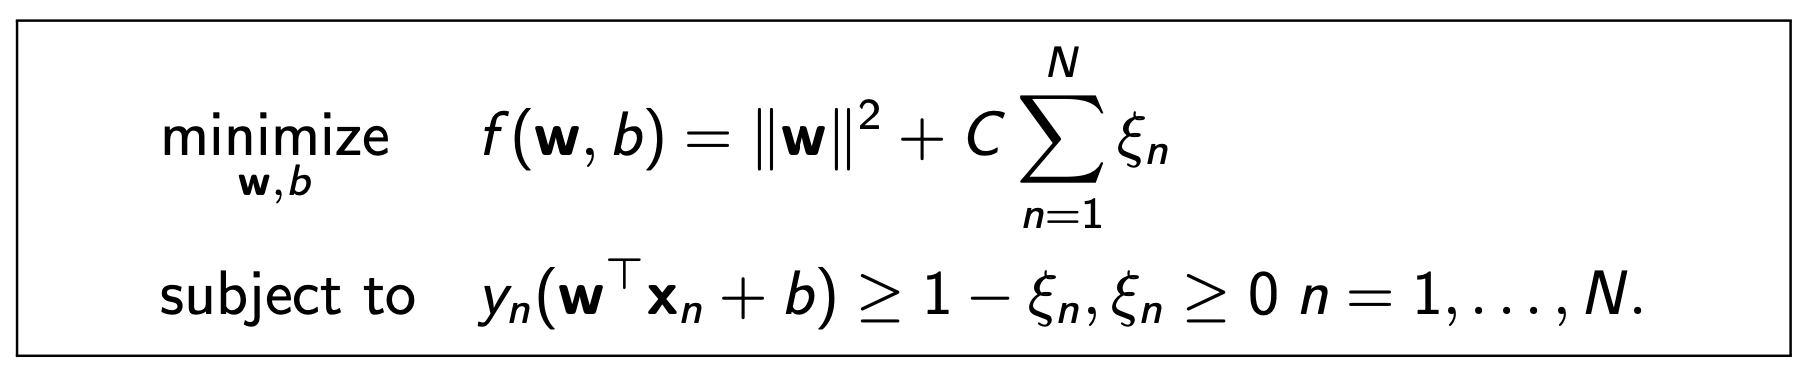



                                                        lecture notes Intro to ML,Mingchen Gao




**Why SVM**


*   Selected sum model because it is easy to separate complex data in SVM with help of kernel functions by projecting the Data into Higher dimensions.


*   RBF : Radial Bias Function is used to project data to infinite dimension.


*   SVM provides soft margin for some data points to be misclassified but still separating then using slack variables.

*   We has multi-class outputs for SVM works well it compares and separates each class with each other





In [46]:
cleaned_df = pd.DataFrame(df_new)
dfc= cleaned_df.groupby('Accident_severity').size()
dfc.head(10)

,0
Accident_severity,
fatal injury,158
serious injury,1743
slight injury,10408


In [47]:
cleaned_df['Number_of_casualties'].value_counts()

,count
Number_of_casualties,
1,8390
2,2290
3,909
4,394
5,207
6,89
7,22
8,8


Selecting Columns from Dataset relevant to our analysis of accidents subject to environmental, road and light conditions

In [48]:
dfsvm= cleaned_df[['Time_of_day_3hr','Area_accident_occured','Road_surface_type','Road_surface_conditions','Light_conditions','Weather_conditions','Vehicle_movement','Type_of_collision','Cause_of_accident','Accident_severity']]
dfsvm.head(10)

,Time_of_day_3hr,Area_accident_occured,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Vehicle_movement,Type_of_collision,Cause_of_accident,Accident_severity
0,Evening,residential areas,asphalt roads,dry,daylight,normal,going straight,collision with roadside-parked vehicles,moving backward,slight injury
1,Evening,office areas,asphalt roads,dry,daylight,normal,going straight,vehicle with vehicle collision,overtaking,slight injury
2,Evening,recreational areas,asphalt roads,dry,daylight,normal,going straight,collision with roadside objects,changing lane to the left,serious injury
3,Midnight,office areas,earth roads,dry,darkness - lights lit,normal,going straight,vehicle with vehicle collision,changing lane to the right,slight injury
4,Midnight,industrial areas,asphalt roads,dry,darkness - lights lit,normal,going straight,vehicle with vehicle collision,overtaking,slight injury
5,Post-Noon,unknown,unknown,dry,daylight,normal,u-turn,vehicle with vehicle collision,overloading,slight injury
6,Evening,residential areas,unknown,dry,daylight,normal,moving backward,vehicle with vehicle collision,other,slight injury
7,Evening,residential areas,asphalt roads,dry,daylight,normal,u-turn,vehicle with vehicle collision,no priority to vehicle,slight injury
8,Evening,industrial areas,earth roads,dry,daylight,normal,going straight,collision with roadside-parked vehicles,changing lane to the right,slight injury
9,Evening,residential areas,asphalt roads,dry,daylight,normal,u-turn,collision with roadside-parked vehicles,moving backward,serious injury


In [49]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dfsvmLE=dfsvm.apply(LE.fit_transform)


Heat map to show the correlation between the columns

<Axes: >

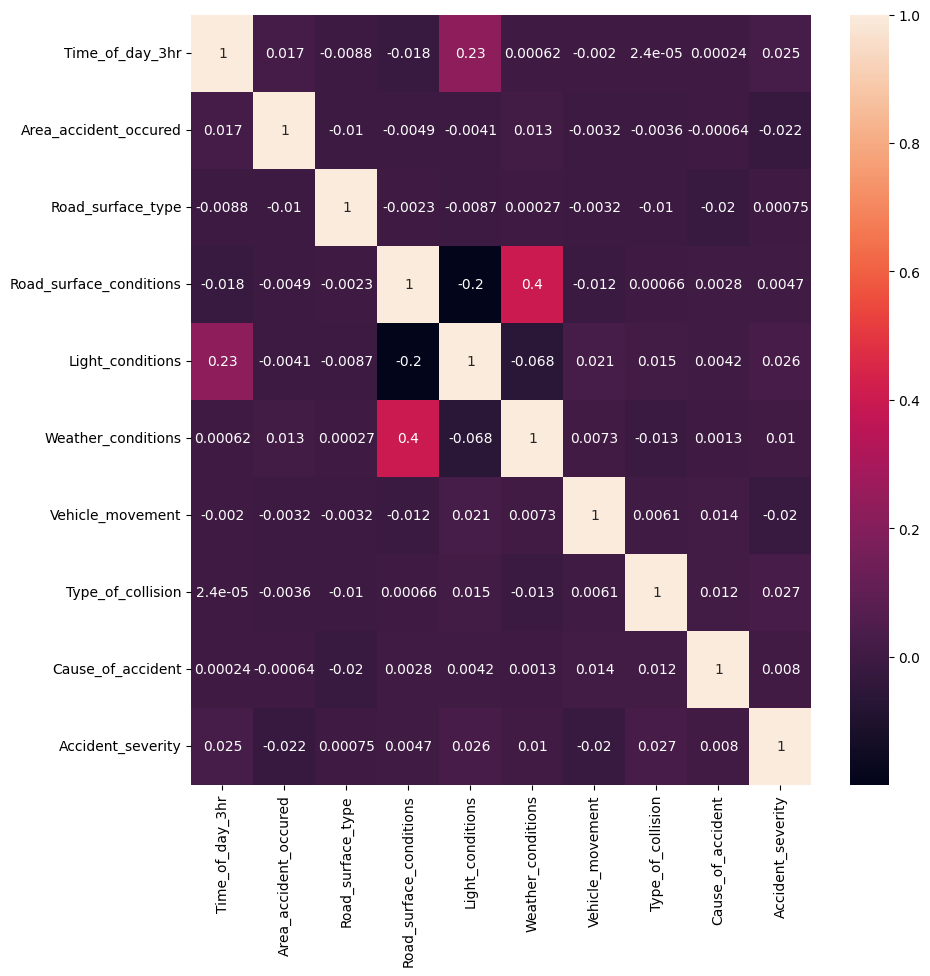

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[10,10])
sns.heatmap(dfsvmLE.corr(),annot=True)

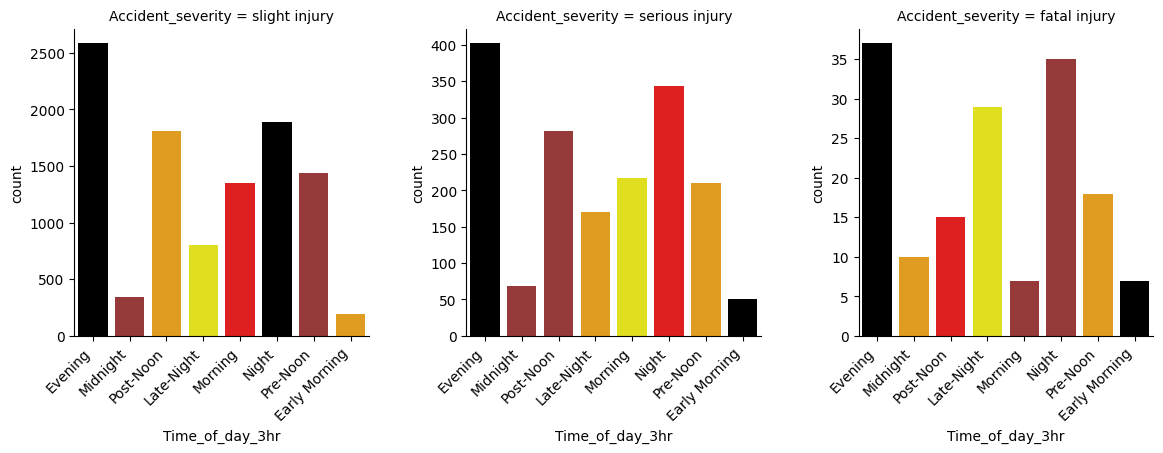

In [51]:
grid = sns.FacetGrid(data=cleaned_df, col='Accident_severity', height=4, aspect=1, sharey=False)
grid.map(sns.countplot, 'Time_of_day_3hr', palette=['black', 'brown', 'orange','yellow','red'])
for x in grid.axes.flat:
    for label in x.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')
plt.show()

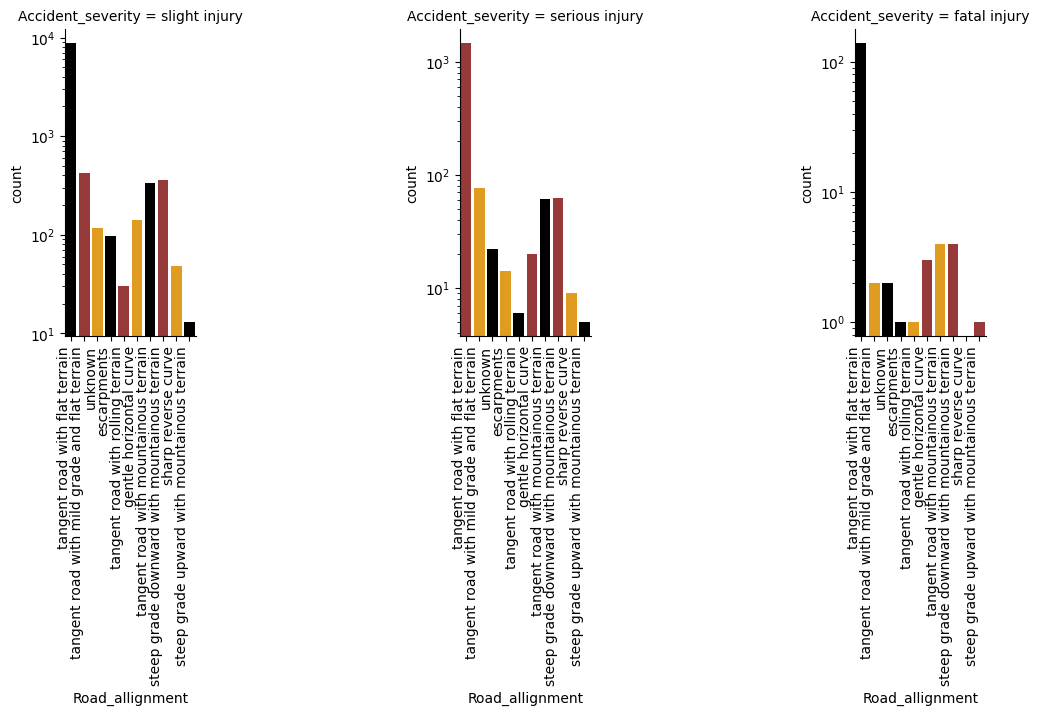

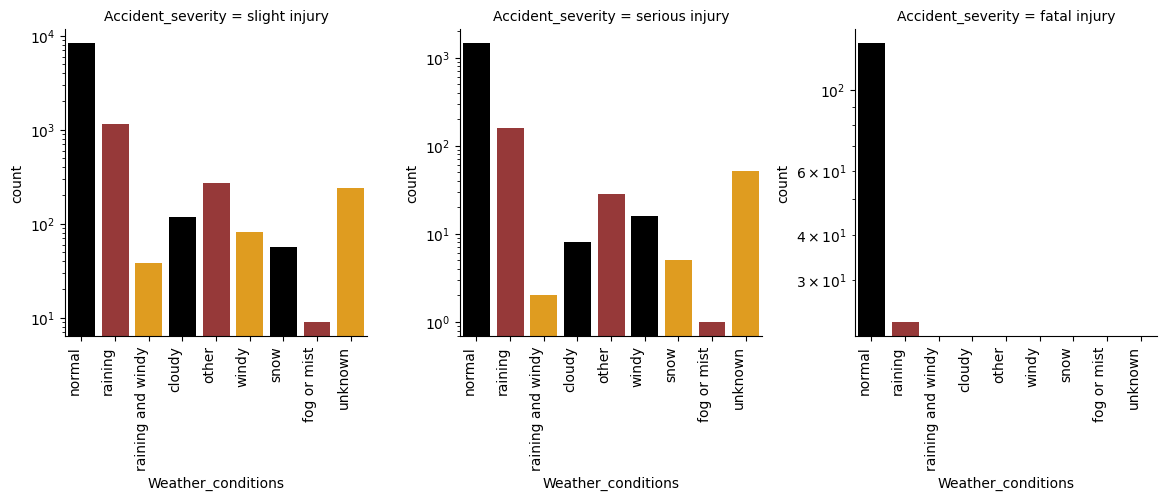

In [52]:
grid = sns.FacetGrid(data=cleaned_df, col='Accident_severity', height=4, aspect=1, sharey=False)
grid.map(sns.countplot, 'Road_allignment', palette=['black', 'brown', 'orange'])
for x in grid.axes.flat:
    x.set_yscale('log')
    for label in x.get_xticklabels():
        label.set_rotation(90)
        label.set_ha('right')
plt.show()
grid = sns.FacetGrid(data=cleaned_df, col='Accident_severity', height=4, aspect=1, sharey=False)
grid.map(sns.countplot, 'Weather_conditions', palette=['black', 'brown', 'orange'])
for x in grid.axes.flat:
    x.set_yscale('log')
    for label in x.get_xticklabels():
        label.set_rotation(90)
        label.set_ha('right')
plt.show()

**Training SVM Model**

**Important parameters for tuning of SVM**


*   **Kernel** : Defines what kind of transformation is to be applied to transform the data.

	examples : rbf, linear, sigmoid, poly

  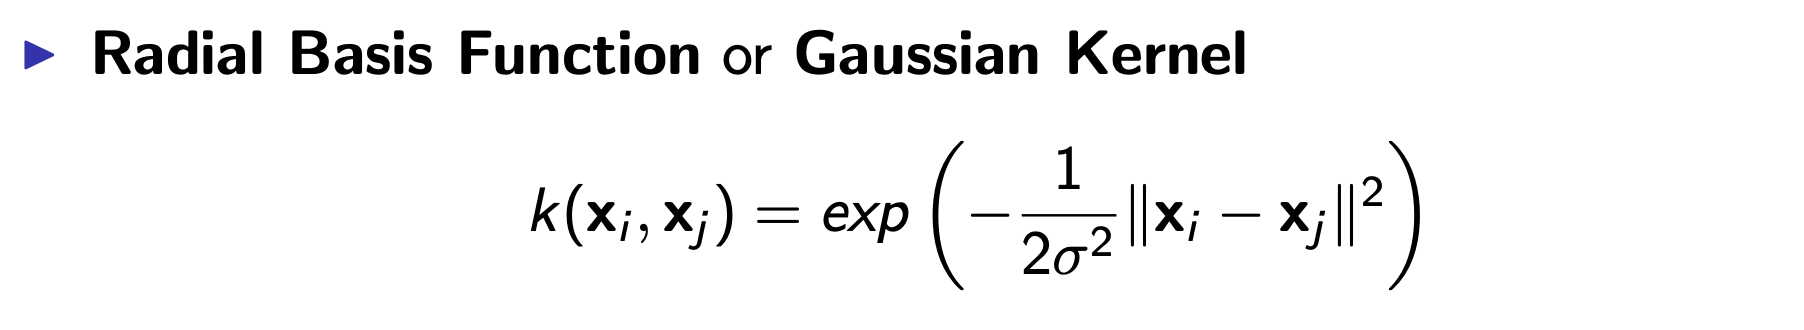
                                        Lecture notes Intro to ML, Mingchen Gao
*   **C : Regularization Parameter** : It is used to incorporate slack variables in the classification of data points. It is a trade-off between maximizing the margin and minimizing classification errors.


*   **Gamma** :  It shows the impact of data points on decision boundary. Higher value means more complex boundary.


**Tuning of parameters.**


*   Selection of Kernel: out of the three kernel viz, sigmoid , rbf and linear, we checked the performance of model over our data and we could see that ref had higher classification accuracy as compared to other 2.
*   Selecting C: we checked different values of C and selected the best value at the after trial and error

*   Selecting gamma: we checked different values of gamma and selected the best value at the after trial and error


From the above training and testing of our model we see that we get highest accuracy for model with X Kernel, with C = , Gamma= .









In [59]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix


def svm_model(X_train,X_test,y_train,y_test):
  param_grid = {
        'C': [0.1,1,10],
        'kernel': ['rbf','linear'],#['linear','rbf','sigmoid'],
        'gamma': [1,'scale',10]#[10]#['scale', 'auto',0.1,1,5,10]
    }

  results = []

  for C in param_grid['C']:
      for kernel in param_grid['kernel']:
          for gamma in param_grid['gamma']:
              pipeline = Pipeline([
                  ('svm', SVC(C=C, kernel=kernel, gamma=gamma))
              ])
              pipeline.fit(X_train, y_train)

              y_pred = pipeline.predict(X_test)

              accuracy = accuracy_score(y_test, y_pred)

              results.append({
                  'C': C,
                  'kernel': kernel,
                  'gamma': gamma,
                  'accuracy': accuracy
              })
              print(f"Params: C={C}, kernel={kernel}, gamma={gamma} -> Accuracy: {accuracy:.4f}")

  best_result = max(results, key=lambda x: x['accuracy'])
  print("\nBest Parameters:")
  print(f"C={best_result['C']}, kernel={best_result['kernel']}, gamma={best_result['gamma']} -> Accuracy: {best_result['accuracy']:.4f}")
  return best_result['accuracy']




Implementing the best suitable model and analysing the performance of model over test data .


In [55]:
def best_model(x1,y1,c,kernel,g):
  X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=42)
  results = []
  pipeline = Pipeline([
      ('svm', SVC(C=c, kernel=kernel, gamma=g))
  ])

  pipeline.fit(X_train, y_train)

  y_pred = pipeline.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  cm=confusion_matrix(y_test,y_pred)
  plt.figure(figsize=[10,10])
  sns.heatmap(cm,annot=True)
  results.append({
      'C': c,
      'kernel': kernel,
      'gamma': g,
      'accuracy': accuracy
  })
  print(f"Params: C={c}, kernel={kernel}, gamma={g} -> Accuracy: {accuracy:.4f}")

**Model 1 : Predicting the Accident severity based on Environmental,Light and road conditions.**

In [ ]:
from sklearn.utils import resample

majority_class = dfsvmLE[dfsvmLE.Accident_severity == 2]
minority_class = dfsvmLE[dfsvmLE.Accident_severity == 0]
minority_class1 = dfsvmLE[dfsvmLE.Accident_severity == 1]

minority_upsampled = resample(minority_class,replace=True,n_samples=len(majority_class),random_state=42)
minority_upsampled1 = resample(minority_class1,replace=True, n_samples=len(majority_class), random_state=42)

upsampled_data = pd.concat([majority_class, minority_upsampled, minority_upsampled1])

x1 = upsampled_data.drop('Accident_severity', axis=1)
y1 = upsampled_data['Accident_severity']

xtrain, xtest, ytrain, ytest = train_test_split(x1, y1, test_size=0.25, random_state=42)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

acc=svm_model(xtrain,xtest,ytrain,ytest)

(23418, 9) (7806, 9) (23418,) (7806,)
Params: C=0.1, kernel=rbf, gamma=1 -> Accuracy: 0.8590
Params: C=0.1, kernel=rbf, gamma=scale -> Accuracy: 0.4673
Params: C=0.1, kernel=rbf, gamma=10 -> Accuracy: 0.8572
Params: C=0.1, kernel=linear, gamma=1 -> Accuracy: 0.3851
Params: C=0.1, kernel=linear, gamma=scale -> Accuracy: 0.3851
Params: C=0.1, kernel=linear, gamma=10 -> Accuracy: 0.3851
Params: C=1, kernel=rbf, gamma=1 -> Accuracy: 0.8919
Params: C=1, kernel=rbf, gamma=scale -> Accuracy: 0.5301
Params: C=1, kernel=rbf, gamma=10 -> Accuracy: 0.9023
Params: C=1, kernel=linear, gamma=1 -> Accuracy: 0.3853
Params: C=1, kernel=linear, gamma=scale -> Accuracy: 0.3853
Params: C=1, kernel=linear, gamma=10 -> Accuracy: 0.3853
Params: C=10, kernel=rbf, gamma=1 -> Accuracy: 0.8947
Params: C=10, kernel=rbf, gamma=scale -> Accuracy: 0.6024
Params: C=10, kernel=rbf, gamma=10 -> Accuracy: 0.9023
Params: C=10, kernel=linear, gamma=1 -> Accuracy: 0.3853


**Confusion Matrix**

Params: C=1, kernel=rbf, gamma=10 -> Accuracy: 0.9041


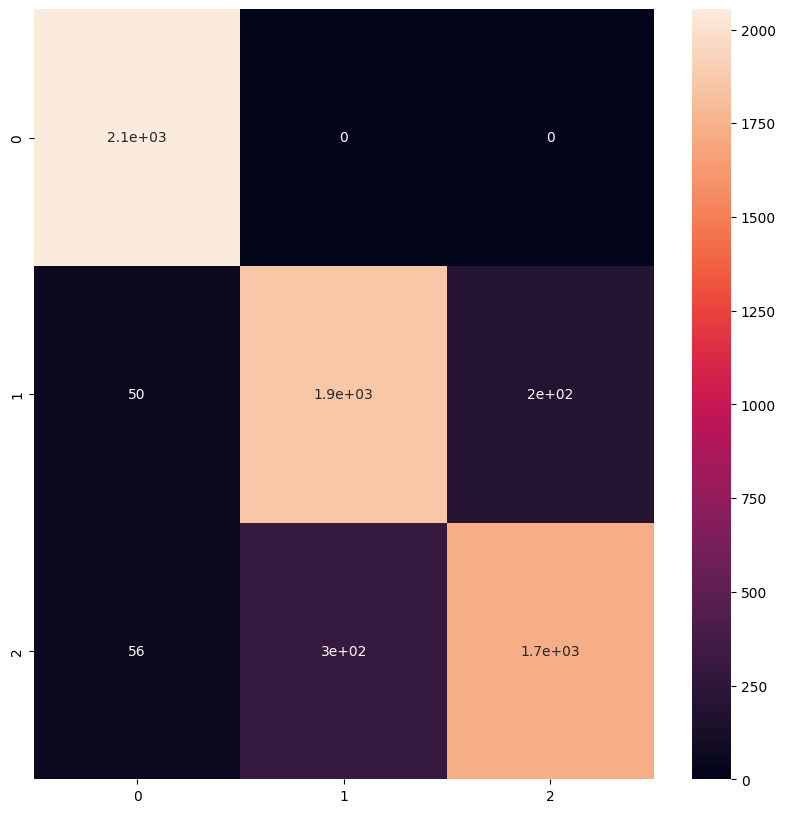

In [57]:
best_model1=best_model(x1,y1,1,'rbf',10)

We reached accuracy of almost 90% while predicting the accident severity based on environmental, loght and other conditions. The parameters involved in training of SVM for the above model are C= 1 using RBF Kernel Function.

**Model 2 : Predicting the Type of Collision based on Environmental,Light and road conditions.**

In [28]:
from sklearn.utils import resample

majority_class = dfsvmLE[dfsvmLE.Type_of_collision == 8]
minority_class = dfsvmLE[dfsvmLE.Type_of_collision == 0]
minority_upsampled = resample(minority_class,replace=True, n_samples=len(majority_class), random_state=42)

minority_class1 = dfsvmLE[dfsvmLE.Type_of_collision == 3]
minority_upsampled1 = resample(minority_class1,replace=True, n_samples=int(len(majority_class)/2), random_state=42)
minority_class2 = dfsvmLE[dfsvmLE.Type_of_collision == 4]
minority_upsampled2 = resample(minority_class2,replace=True,  n_samples=int(len(majority_class)/2), random_state=42)
minority_class3 = dfsvmLE[dfsvmLE.Type_of_collision == 5]
minority_upsampled3 = resample(minority_class3,replace=True,   n_samples=int(len(majority_class)/2),random_state=42)
minority_class4 = dfsvmLE[dfsvmLE.Type_of_collision == 6]
minority_upsampled4 = resample(minority_class4,replace=True, n_samples=int(len(majority_class)/2),  random_state=42)
minority_class5 = dfsvmLE[dfsvmLE.Type_of_collision == 1]
minority_upsampled5 = resample(minority_class5,replace=True,   n_samples=int(len(majority_class)/2), random_state=42)
minority_class6 = dfsvmLE[dfsvmLE.Type_of_collision == 7]
minority_upsampled6 = resample(minority_class6,replace=True, n_samples=int(len(majority_class)/2),random_state=42)
minority_class7 = dfsvmLE[dfsvmLE.Type_of_collision == 2]
minority_upsampled7 = resample(minority_class7,replace=True, n_samples=int(len(majority_class)/2), random_state=42)
minority_class8 = dfsvmLE[dfsvmLE.Type_of_collision == 9]
minority_upsampled8 = resample(minority_class8,replace=True, n_samples=int(len(majority_class)/2), random_state=42)

print(majority_class.shape)
print(minority_class.shape)
print(minority_class1.shape)
print(minority_class2.shape)
print(minority_class3.shape)
print(minority_class4.shape)
print(minority_class5.shape)
print(minority_class6.shape)
print(minority_class7.shape)
print(minority_class8.shape)
upsampled_data = pd.concat([majority_class, minority_upsampled, minority_upsampled1,minority_upsampled2,minority_upsampled3,minority_upsampled4,minority_upsampled5,minority_upsampled6,minority_upsampled7,minority_upsampled8])
x1 = upsampled_data.drop('Type_of_collision', axis=1)
y1 = upsampled_data['Type_of_collision']

xtrain, xtest, ytrain, ytest = train_test_split(x1, y1, test_size=0.2, random_state=42)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

acc=svm_model(xtrain,xtest,ytrain,ytest)

(8769, 10)
(171, 10)
(54, 10)
(34, 10)
(26, 10)
(396, 10)
(896, 10)
(169, 10)
(1785, 10)
(9, 10)
(42088, 9) (10522, 9) (42088,) (10522,)
Params: C=10, kernel=rbf, gamma=1 -> Accuracy: 0.8390
Params: C=10, kernel=rbf, gamma=10 -> Accuracy: 0.8429

Best Parameters:
C=10, kernel=rbf, gamma=10 -> Accuracy: 0.8429


**Confusion Matrix**

Params: C=10, kernel=rbf, gamma=10 -> Accuracy: 0.8360


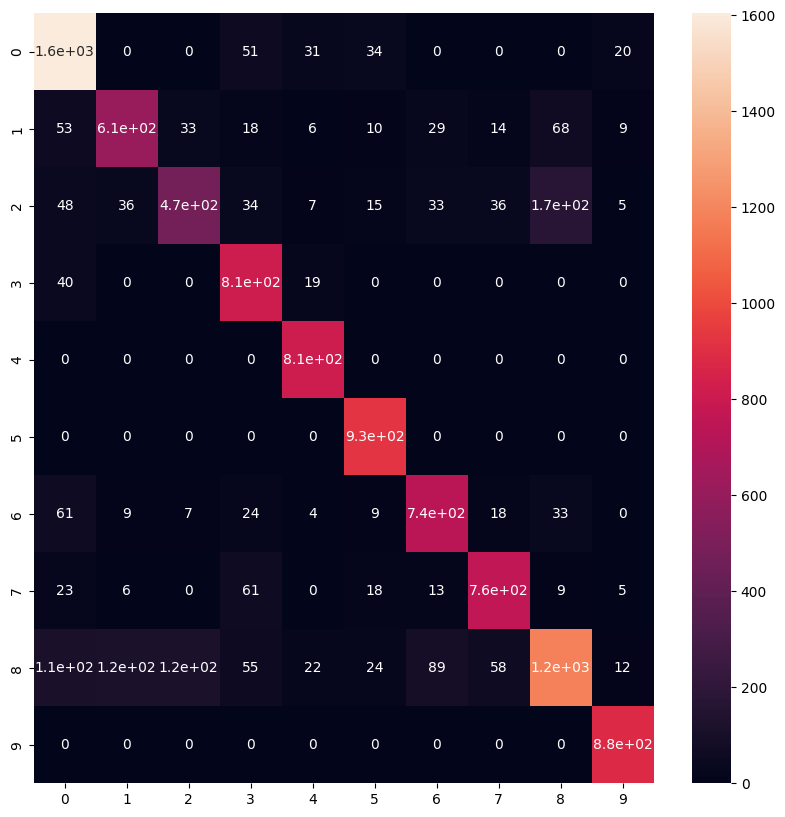

In [29]:
best_model2=best_model(x1,y1,10,'rbf',10)

Training SVM model over data to predict the type of collision gives accuracy of about 84% with parameters , C=10, RBF kernel function and gamma =10 and the above confusion matrix shows the classification of predictions


**Key Takeaway**  
* In this problem we are identifying the impact of time of day, weather, light condition, road surface conditions, type of collisions etc on the severity of accident. We are learning from the available data about the severity of accidents under certain conditions and predicting how much severe of accidents are more likely to happen. Also predicting what kind of collision can happen given the surrounding conditions.

*  By understanding these factors and predicting results in advance can help drivers to understand vulnerable conditions to take care of while driving under similar situations and be cautious to avoid collisions. It helps authorities to devise plans to tackle the environmental conditions and spread awareness about dangerous road sections, low visibility regions, appropriate road signs to warn drivers, take measures to improve lighting conditions, frequently cleaning snow on road etc.

*  Analysis of accident severity based on weather conditions, light, time of day can help health infrastructure to be alert and responsive when combination of these parameters are present. It will help in reduction of severe injury and lower casualties as proper medical help is provided on time



